######## DATA LOAD
Data loaded
######## GENERAL INFORMATION
######## Total: 
Amount of reviews:  37864
######## COMPLETION CHECK
Missing Text
Missing/Empty review text: 0
Missing review text as percentage: 0.00% 
Missing Label
Missing rating information 0
Missing rating information as percentage: 0.00%
Before deleting empty review texts:  37864
After deleting empty review texts:  37864
######## DUPLICATION CHECK
Before deleting duplicate entries:  37864
After deleting duplicate entries:  37864
Before deleting duplicate review texts:  37864
After deleting duplicate review texts:  37864
######## WORD COUNT
The longest review text in our sample has 16108 words.
Longest review text:

96957    "\n             \n\n\n{\n    \"@context\":\"ht...
Name: text, dtype: object 96957    5
Name: label, dtype: int64
The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 8 times.
308163              "OK"
339106      "Exercising"
344655        "Confor

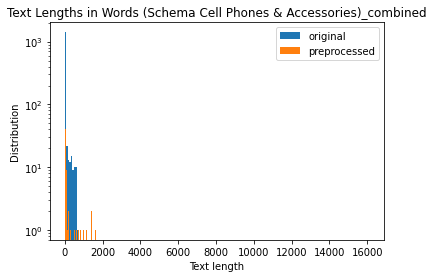

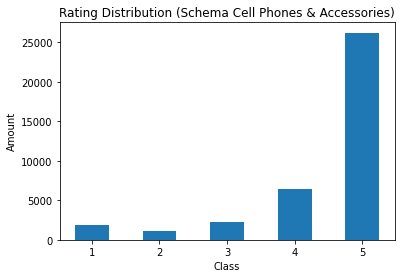

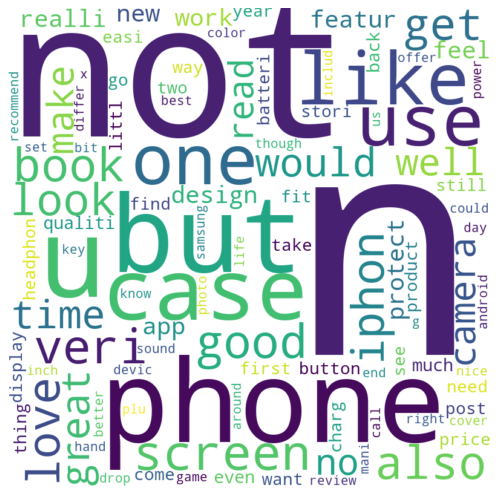

,Word,Frequency
0,n,42353
1,not,41145
2,phone,35542
3,u,32598
4,but,30345
...,...,...
95,hand,3502
96,drop,3498
97,game,3482
98,photo,3446


<Figure size 432x288 with 0 Axes>

In [1]:
from Scripts import profiling as pf, preprocessing as prep, cleaning as cl
import pandas as pd

print('######## DATA LOAD')
schema_input = '../Data/schema_phone.pkl'
df = pd.read_pickle(schema_input)
print('Data loaded')


print('######## GENERAL INFORMATION')
pf.get_review_count(df)


print('######## COMPLETION CHECK')
print('Missing Text')
pf.get_missing_text(df)
print('Missing Label')
pf.get_missing_label(df)
print('Before deleting empty review texts: ', len(df))
df = df[df['text'] != '']
print('After deleting empty review texts: ', len(df))


print('######## DUPLICATION CHECK')
df = cl.remove_duplicates(df)
df = cl.remove_dup_text(df)


print('######## WORD COUNT')
df = pf.create_word_count(df)
pf.get_longest_review(df)
pf.get_shortest_review(df)

print('# Less than 10 words: ')
print(df[df.word_count<10]['label'].value_counts())
print('More than 1000 words: ')
print(df[df.word_count>1000]['label'].value_counts())

pf.show_word_length_dist(df, 'schema_phone_textlength_raw_logarithmic', 'Schema Cell Phones & Accessories', True)
# pf.show_word_length_dist(df, 'schema_phone_textlength_raw', 'Schema Cell Phones & Accessories', False)


print('######## RATING DISTRIBUTION')
pf.show_rating_dist(df, 'schema_phone_class_dist_raw', 'Schema Cell Phones & Accessories')


print('######## DATA SOURCES')
df = pf.get_source_info(df)


print('######## Most Frequent Words')
pf.get_mostcommon(df, 'test_most_common_phone')

In [44]:
from collections import Counter

# for i in df['pos']:
#     pos_counts = Counter((j[1] for j in i))
#     print(pos_counts)

cnt = Counter()
# all_count = 0
# NN_count = 0
for row in df['pos']:
    for tuple in row:
        cnt[tuple[1]] += 1
        # all_count += 1
        # if tuple[1] == 'NN':
            # NN_count += 1
print(cnt)
# print(all_count)
# print(NN_count)

        # df_pos.append({'tag': j[0]}, ignore_index=True)
# print(df_pos)
# df_new['tags'].value_counts()

Counter({'NN': 818500, 'JJ': 499647, 'RB': 240019, 'NNS': 213985, 'VBP': 100283, 'VBD': 91530, 'VBG': 88647, 'VB': 66415, 'VBZ': 56676, 'VBN': 53850, 'IN': 53070, 'CC': 36232, 'CD': 26473, 'MD': 21578, 'DT': 14608, 'JJR': 11946, 'JJS': 8684, 'RBR': 6778, 'NNP': 6196, 'PRP': 4152, 'FW': 3407, 'RP': 1960, 'RBS': 585, 'WP': 409, 'WDT': 378, 'WRB': 297, 'WP$': 235, 'UH': 208, 'TO': 97, 'PRP$': 59, 'EX': 29, 'PDT': 22, 'POS': 16, 'NNPS': 7, 'SYM': 7, "''": 2, '$': 2})
2426989
818500


In [43]:
print(df['pos'].head(1))

184    [(huawei, NN), (nova, JJ), (price, NN), (range...
Name: pos, dtype: object


In [ ]:
df[df.label==3.0]['netloc'].value_counts()

In [4]:
len(df[df.NODE.str.contains('znode')])



21669